<a href="https://colab.research.google.com/github/renatalucia/KaggleTPSApril21/blob/main/KagglePlaygroundApril21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [211]:
!pip install --upgrade --force-reinstall --no-deps kaggle

Processing /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303/kaggle-1.5.12-cp37-none-any.whl
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [212]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"renatalucia","key":"7f35d1eff8235434d4449562279d1adb"}'}

In [213]:
#Make directory named kaggle and copy kaggle.json file there.
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

#Change the permissions of the file.
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [214]:
!kaggle competitions download -c tabular-playground-series-apr-2021

tabular-playground-series-apr-2021.zip: Skipping, found more recently modified local copy (use --force to force download)


In [215]:
!ls /content

 classification.csv    kaggle.json   tabular-playground-series-apr-2021.zip
 classifications.csv   playground
'kaggle (1).json'      sample_data


In [216]:
!unzip /content/tabular-playground-series-apr-2021.zip -d playground

Archive:  /content/tabular-playground-series-apr-2021.zip
replace playground/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: playground/sample_submission.csv  
replace playground/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: playground/test.csv     
replace playground/train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: playground/train.csv    


In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [219]:
df_train = pd.read_csv('/content/playground/train.csv')
print(df_train.columns)
print(len(df_train.columns))
print(df_train.head(100))

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
12
    PassengerId  Survived  Pclass  ...    Fare   Cabin  Embarked
0             0         1       1  ...   27.14  C12239         S
1             1         0       3  ...   13.35     NaN         S
2             2         0       3  ...   71.29     NaN         S
3             3         0       3  ...   13.04     NaN         S
4             4         1       3  ...    7.76     NaN         S
..          ...       ...     ...  ...     ...     ...       ...
95           95         1       2  ...   32.24     NaN         S
96           96         1       2  ...   26.46     NaN         Q
97           97         1       1  ...  131.28   D7415         Q
98           98         1       2  ...   27.88     NaN         S
99           99         1       1  ...  278.56  C16097         C

[100 rows x 12 columns]


In [113]:
df_test = pd.read_csv('/content/playground/test.csv')
print(df_test.columns)
print(len(df_test.columns))
print(df_test.head(100))

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
11
    PassengerId  Pclass              Name  ...   Fare   Cabin  Embarked
0        100000       3  Holliday, Daniel  ...  63.01     NaN         S
1        100001       3  Nguyen, Lorraine  ...   5.81     NaN         S
2        100002       1   Harris, Heather  ...  38.91  B15315         C
3        100003       2      Larsen, Eric  ...  12.93     NaN         S
4        100004       1     Cleary, Sarah  ...  26.89  B22515         C
..          ...     ...               ...  ...    ...     ...       ...
95       100095       3     Guzma, Donald  ...   8.48     NaN         S
96       100096       3     Mclean, Robin  ...  12.76     NaN         C
97       100097       2    Lopez, Darlene  ...   6.17     NaN         S
98       100098       3     Tobe, Enrique  ...  11.64  A10911         S
99       100099       3   Ricker, Matthew  ...  31.12     NaN   

In [ ]:
print(df_train.shape)
print(df_test.shape)

(100000, 12)
(100000, 11)


In [ ]:
pd.set_option('display.max_columns', 12)
pd.set_option('display.width', 1000)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [ ]:
# Check missing values
print('Missing values per columns in train dataset')
for col in df_train.columns:
    temp_col = df_train[col].isnull().sum()
    print(f'{col}: {temp_col}')
print()
print('Missing values per columns in test dataset')
for col in df_test.columns:
    temp_col = df_test[col].isnull().sum()
    print(f'{col}: {temp_col}')

Missing values per columns in train dataset
PassengerId: 0
Survived: 0
Pclass: 0
Name: 0
Sex: 0
Age: 3292
SibSp: 0
Parch: 0
Ticket: 4623
Fare: 134
Cabin: 67866
Embarked: 250

Missing values per columns in test dataset
PassengerId: 0
Pclass: 0
Name: 0
Sex: 0
Age: 3487
SibSp: 0
Parch: 0
Ticket: 5181
Fare: 133
Cabin: 70831
Embarked: 277


# Check distribution of target value

In [ ]:
df_dist = df_train["Survived"].value_counts()
print(df_dist)
print()
print("Not Survived: " + str(np.array(df_dist)[0]/np.array(df_dist).sum()) + "%")
print("Survived: " + str(np.array(df_dist)[1]/np.array(df_dist).sum()) + "%")

0    57226
1    42774
Name: Survived, dtype: int64

Not Survived: 0.57226%
Survived: 0.42774%


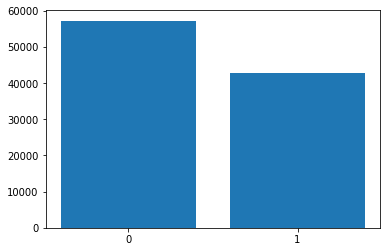

In [ ]:
plt.bar(["0","1"], np.array(df_dist))
plt.show()

# Check features distributions

In [ ]:

num_instances = len(df_train)
print(num_instances)
for col in df_train.columns:
  
  if col=="PassengerId":
    continue
  if col=="Survived":
    continue
  if col=="Name":
    continue
  print()
  print("**" + col + "**")
  s = df_train[col].value_counts()
  df_feat_dist = pd.DataFrame({col: s.index, "sum":s.values})
  df_feat_dist["%"] = df_feat_dist["sum"]/num_instances
  print(df_feat_dist)


# TODO:
# Group age in categories (?)

100000

**Pclass**
   Pclass    sum        %
0       3  41006  0.41006
1       1  30315  0.30315
2       2  28679  0.28679

**Sex**
      Sex    sum        %
0    male  56114  0.56114
1  female  43886  0.43886

**Age**
      Age   sum        %
0    25.0  2354  0.02354
1    23.0  2345  0.02345
2    26.0  2320  0.02320
3    24.0  2298  0.02298
4    27.0  2088  0.02088
..    ...   ...      ...
168  69.5     1  0.00001
169  87.0     1  0.00001
170  74.5     1  0.00001
171  78.5     1  0.00001
172  80.5     1  0.00001

[173 rows x 3 columns]

**SibSp**
   SibSp    sum        %
0      0  73308  0.73308
1      1  19758  0.19758
2      2   3703  0.03703
3      3   1635  0.01635
4      4   1168  0.01168
5      8    296  0.00296
6      5    132  0.00132

**Parch**
   Parch    sum        %
0      0  73540  0.73540
1      1  12996  0.12996
2      2  11236  0.11236
3      3    983  0.00983
4      4    446  0.00446
5      5    331  0.00331
6      9    264  0.00264
7      6    204  0.00204

**Ticket*

# Missing values per columns in train dataset

In [ ]:
print('Missing values per columns in train dataset')
for col in df_train.columns:
    temp_col = df_train[col].isnull().sum()
    print(f'{col}: {temp_col}')

Missing values per columns in train dataset
PassengerId: 0
Survived: 0
Pclass: 0
Name: 0
Sex: 0
Age: 3292
SibSp: 0
Parch: 0
Ticket: 4623
Fare: 134
Cabin: 67866
Embarked: 250


# Feature Preprocessing

In [ ]:
df_train["Cabin_code"] = df_train["Cabin"].str[0]
df_test["Cabin_code"] = df_test["Cabin"].str[0]

# Categorical columns preprocessing

In [ ]:
df_train["Sex"] = pd.Categorical(df_train["Sex"])
df_train["Sex"] = np.array(df_train.Sex.cat.codes)

In [ ]:
df_train["Embarked"] = pd.Categorical(df_train["Embarked"])

# Add 1 because NAN was map to -1
df_train["Embarked"] = np.array(df_train.Embarked.cat.codes + 1)

In [ ]:
df_train["Ticket"] = pd.Categorical(df_train["Ticket"])

# Add 1 because NAN was map to -1
df_train["Ticket"] = np.array(df_train.Ticket.cat.codes + 1)

In [ ]:
df_train["Cabin"] = pd.Categorical(df_train["Cabin"])

# Add 1 because NAN was map to -1
df_train["Cabin"] = np.array(df_train.Cabin.cat.codes + 1)

# Survival rates according to parameters


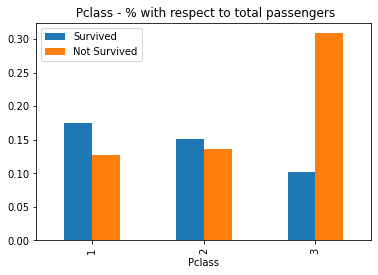

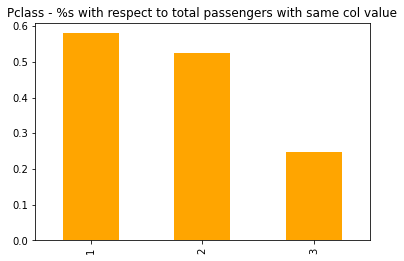

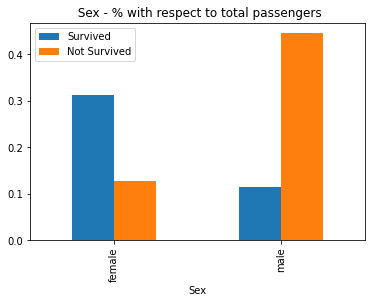

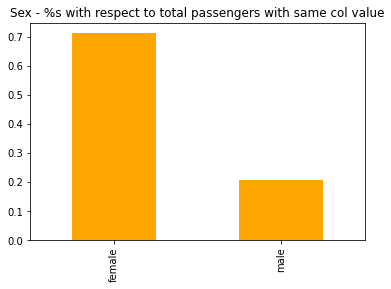

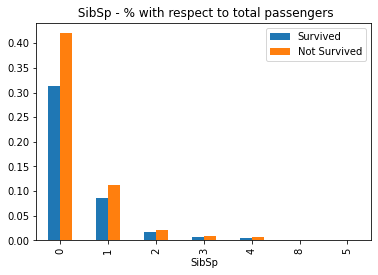

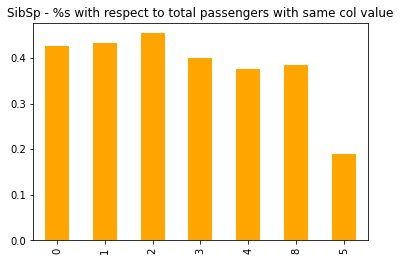

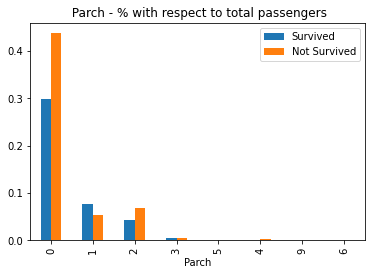

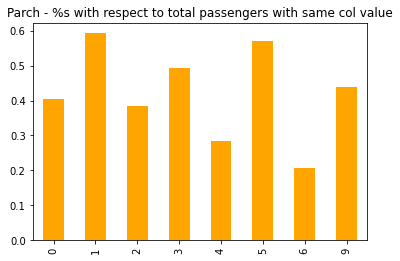

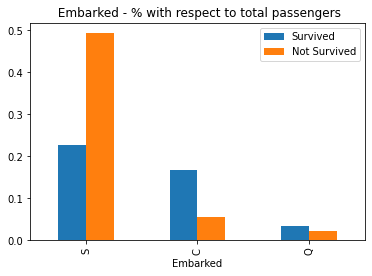

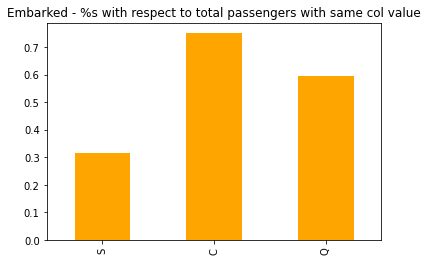

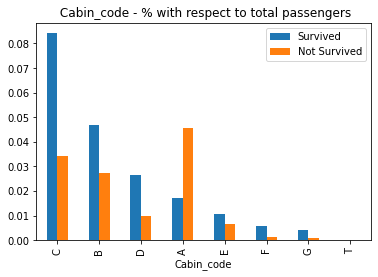

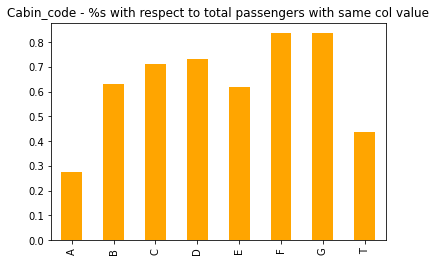

In [ ]:
total_pessengers = len(df_train)
for col in df_train.columns:


  if col not in  [
                 "Pclass", "SibSp","Parch", 
                 "Embarked" , "Sex", "Cabin_code"]:

  #if col not in  [
  #              "Sex"]:

    continue

  df_survived = df_train.loc[df_train['Survived'] == 1][col].value_counts()
  df_survived_perc = df_survived / total_pessengers
  df_not_survived = df_train.loc[df_train['Survived'] == 0][col].value_counts()
  df_not_survived_perc = df_not_survived / total_pessengers


  xlabels = []
  y1values = []
  y2values = []
  for k, v in df_survived_perc.items():
    xlabels.append(k)
    y1values.append(df_survived_perc[k])
    y2values.append(df_not_survived_perc[k])

  # creating dataframe
  df = pd.DataFrame({
      col: xlabels,
      'Survived': y1values,
      'Not Survived': y2values
  })

  df.plot(x=col, 
          y=["Survived", "Not Survived"], 
          kind="bar",
          title=" {} - % with respect to total passengers".format(col))
  plt.show()


  #df_survived_perc.plot(x=df_survived_perc.values, 
  #                      y=np.array(df_survived_perc.index), 
  #                      kind="bar", 
  #                      title=" {} - % with respect to total passengers".format(col))
  #plt.show()
  
  df_total = df_train[col].value_counts()

  df_survived_perc = df_survived / df_total
  df_survived_perc.plot(x=df_survived_perc.values, 
                        y=np.array(df_survived_perc.index), 
                        kind="bar", 
                        color = "orange",
                        title="{} - %s with respect to total passengers with same col value".format(col))
  plt.show()
  print()

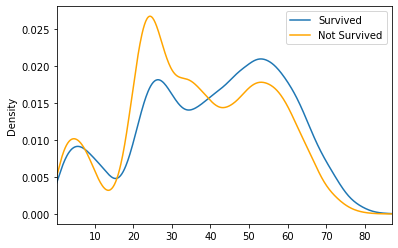

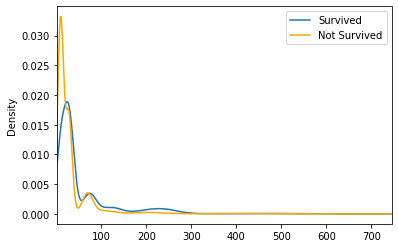

In [ ]:
for col in ["Age", "Fare"]:
  df_train.loc[df_train["Survived"]==1][col].plot(kind='kde', 
                                               legend=True, 
                                               label = "Survived",
                                               xlim= [df_train[col].min(), 
                                                      df_train[col].max()])
  
  df_train.loc[df_train["Survived"]==0][col].plot(kind='kde', 
                                               legend=True, 
                                               color = "orange",
                                               label = "Not Survived",
                                               xlim= [df_train[col].min(), 
                                                      df_train[col].max()])
  plt.show()

In [ ]:
df_train.loc[df_train["Survived"]==1].Fare.plot(kind='kde', 
                                               legend=True, 
                                               xlim= [df_train["Fare"].min(), 
                                                      df_train["Fare"].max()])

# Categorical columns preprocessing

In [ ]:
df_train["Sex"] = pd.Categorical(df_train["Sex"])
df_train["Sex"] = np.array(df_train.Sex.cat.codes)

In [ ]:
df_train["Embarked"] = pd.Categorical(df_train["Embarked"])

# Add 1 because NAN was map to -1
df_train["Embarked"] = np.array(df_train.Embarked.cat.codes + 1)

In [ ]:
df_train["Ticket"] = pd.Categorical(df_train["Ticket"])

# Add 1 because NAN was map to -1
df_train["Ticket"] = np.array(df_train.Ticket.cat.codes + 1)

In [ ]:
df_train["Cabin_code"] = pd.Categorical(df_train["Cabin_code"])

# Add 1 because NAN was map to -1
df_train["Cabin_code"] = np.array(df_train.Cabin_code.cat.codes + 1)

# Search best features for the classification problem

In [ ]:
x_train = np.array(df_train[["PassengerId", "Ticket", "Cabin_code", 
                             "Fare", "Pclass", "SibSp","Parch", 
                             "Embarked", "Sex", "Age"]].fillna(0))

feature_names = ["PassengerId", "Ticket", "Cabin_code", 
                 "Fare", "Pclass", "SibSp","Parch", 
                 "Embarked" , "Sex", "Age"]

In [ ]:
x_train

array([[0.0000e+00, 1.0358e+04, 3.0000e+00, ..., 3.0000e+00, 1.0000e+00,
        0.0000e+00],
       [1.0000e+00, 1.7044e+04, 0.0000e+00, ..., 3.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.0000e+00, 5.9885e+04, 0.0000e+00, ..., 3.0000e+00, 1.0000e+00,
        3.3000e-01],
       ...,
       [9.9997e+04, 0.0000e+00, 0.0000e+00, ..., 3.0000e+00, 1.0000e+00,
        3.7000e+01],
       [9.9998e+04, 4.3481e+04, 0.0000e+00, ..., 3.0000e+00, 1.0000e+00,
        5.1000e+01],
       [9.9999e+04, 4.3335e+04, 0.0000e+00, ..., 3.0000e+00, 1.0000e+00,
        5.5000e+01]])

In [ ]:
y_train = np.array(df_train["Survived"])

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(x_train, y_train)
#X_train_fs = fs.transform(x_train)
#X_test_fs = fs.transform(X_test)

SelectKBest(k='all', score_func=<function f_classif at 0x7f7fd68c6560>)

In [ ]:
for i in range(len(fs.scores_)):
	print('Feature %s: %f' % (feature_names[i], fs.scores_[i]))

Feature PassengerId: 0.382420
Feature Ticket: 185.097274
Feature Cabin_code: 9264.689754
Feature Fare: 3635.991548
Feature Pclass: 9162.873065
Feature SibSp: 5.756985
Feature Parch: 54.559563
Feature Embarked: 15647.226738
Feature Sex: 34645.490634
Feature Age: 962.103538


In [ ]:
# Looking deeper at feature "Cabin"
# "Cabin" == 0 corresponds to null values
# From the values feature "Cabin" is not relevant 

print("Number of survived per Cabin")
print(df_train.groupby('Cabin')["Survived"].sum())
print()
print("Number of passengers per Cabin")
df_train.groupby('Cabin')["Survived"].count()

Number of survived per Cabin
Cabin
0        23217
1            1
2            0
3            0
4            0
         ...  
26988        1
26989        0
26990        1
26991        0
26992        0
Name: Survived, Length: 26993, dtype: int64

Number of passengers per Cabin


Cabin
0        67866
1            1
2            1
3            1
4            1
         ...  
26988        1
26989        1
26990        1
26991        1
26992        1
Name: Survived, Length: 26993, dtype: int64

In [ ]:
# Looking deeper at feature "Ticket"
# "Ticket" == 0 corresponds to null values
# From the values feature "Ticket" is probably not relevant 

print("Number of survived per Ticket")
print(df_train.groupby('Ticket')["Survived"].sum())
print()
print("Number of passengers per Ticket")
df_train.groupby('Ticket')["Survived"].count()

Number of survived per Ticket
Ticket
0        2413
1           1
2           1
3           1
4           2
         ... 
75327       0
75328       1
75329       0
75330       1
75331       0
Name: Survived, Length: 75332, dtype: int64

Number of passengers per Ticket


Ticket
0        4623
1           1
2           1
3           2
4           5
         ... 
75327       1
75328       1
75329       1
75330       1
75331       1
Name: Survived, Length: 75332, dtype: int64

In [ ]:
# Features Name and Survived are left out
# ? Ticket and cabin are really relevant despite the amount of null values?

# Comparing feature distributions bewteen train and test datasets

In [ ]:
df_train = pd.read_csv('/content/playground/train.csv')
print(df_train.columns)
print(len(df_train.columns))
print(df_train.head(100))

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype='object')
12
    PassengerId  Survived  Pclass              Name     Sex    Age  SibSp  Parch     Ticket    Fare   Cabin Embarked
0             0         1       1  Oconnor, Frankie    male    NaN      2      0     209245   27.14  C12239        S
1             1         0       3       Bryan, Drew    male    NaN      0      0      27323   13.35     NaN        S
2             2         0       3    Owens, Kenneth    male   0.33      1      2  CA 457703   71.29     NaN        S
3             3         0       3     Kramer, James    male  19.00      0      0   A. 10866   13.04     NaN        S
4             4         1       3     Bond, Michael    male  25.00      0      0     427635    7.76     NaN        S
..          ...       ...     ...               ...     ...    ...    ...    ...        ...     ...     ...      ...
95           95         1       2     

In [ ]:
df_counts_train = {}
for col in df_train.columns:
  
  if col=="PassengerId":
    continue
  if col=="Survived":
    continue
  if col=="Name":
    continue

  s = df_train[col].value_counts()
  df_feat_dist = pd.DataFrame({col: s.index, "sum":s.values})
  df_counts_train[col] = df_feat_dist


In [ ]:
df_counts_test = {}
for col in df_test.columns:
  
  if col=="PassengerId":
    continue
  if col=="Survived":
    continue
  if col=="Name":
    continue

  s = df_test[col].value_counts()
  df_feat_dist = pd.DataFrame({col: s.index, "sum":s.values})
  df_counts_test[col] = df_feat_dist

Pclass
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


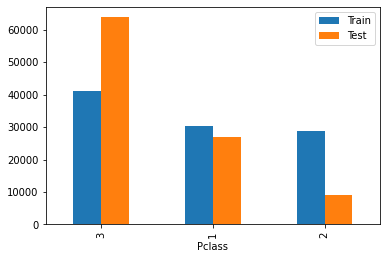

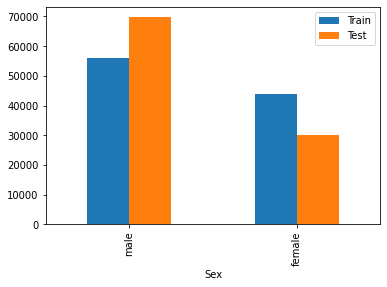

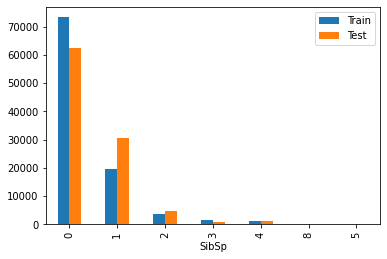

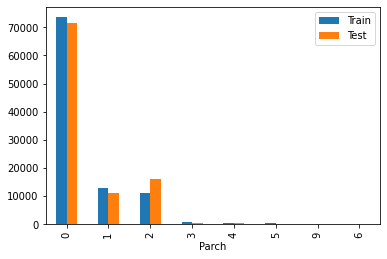

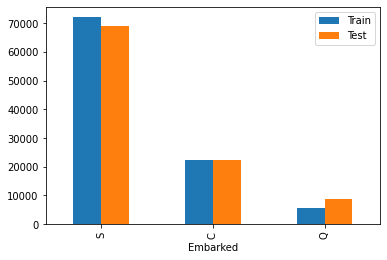

In [ ]:

# importing pandas library
import pandas as pd
# import matplotlib library
import matplotlib.pyplot as plt

for col, df in df_counts_train.items():

  print(col)

  if col not in  [
                 "Pclass", "SibSp","Parch", 
                 "Embarked" , "Sex"]:
    continue

  xlabels = []
  y1values = []
  y2values = []
  for item in df_counts_train[col][col]:
    xlabels.append(item)

    y1values.append(df_counts_train[col].loc[df_counts_train[col][col]==item]["sum"].item())

    y2values.append(df_counts_test[col].loc[df_counts_test[col][col]==item]["sum"].item())

  # creating dataframe
  df = pd.DataFrame({
      col: xlabels,
      'Train': y1values,
      'Test': y2values
  })
    
  # plotting graph 
  df.plot(x=col, y=["Train", "Test"], kind="bar")

In [ ]:
df_age = pd.concat([df_train["Age"], df_test["Age"]], keys=["train", "test"], names=['type', 'rowid']).reset_index()
df_fare = pd.concat([df_train["Fare"], df_test["Fare"]], keys=["train", "test"], names=['type', 'rowid']).reset_index()

type
test     AxesSubplot(0.125,0.125;0.775x0.755)
train    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

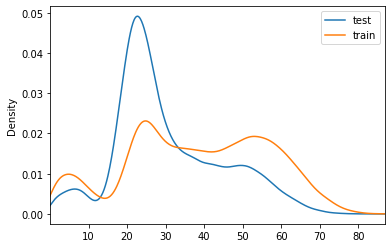

In [ ]:
df_age.groupby('type').Age.plot(kind='kde', legend=True, xlim= [df_age["Age"].min(), df_age["Age"].max()])

type
test     AxesSubplot(0.125,0.125;0.775x0.755)
train    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Fare, dtype: object

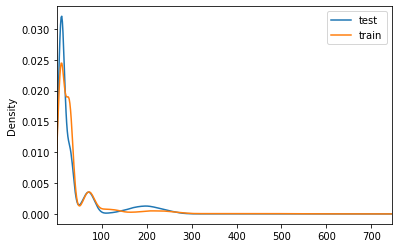

In [ ]:
df_fare.groupby('type').Fare.plot(kind='kde', legend=True, xlim= [df_fare["Fare"].min(), df_fare["Fare"].max()])

# Classification Model

In [220]:
import tensorflow as tf

In [222]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [223]:
print(tf.__version__)

2.4.1


In [ ]:
# Read Dataset and format for training

In [229]:
df_train = pd.read_csv('/content/playground/train.csv')
print(df_train.columns)
print(len(df_train.columns))
print(df_train.head(100))

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
12
    PassengerId  Survived  Pclass  ...    Fare   Cabin  Embarked
0             0         1       1  ...   27.14  C12239         S
1             1         0       3  ...   13.35     NaN         S
2             2         0       3  ...   71.29     NaN         S
3             3         0       3  ...   13.04     NaN         S
4             4         1       3  ...    7.76     NaN         S
..          ...       ...     ...  ...     ...     ...       ...
95           95         1       2  ...   32.24     NaN         S
96           96         1       2  ...   26.46     NaN         Q
97           97         1       1  ...  131.28   D7415         Q
98           98         1       2  ...   27.88     NaN         S
99           99         1       1  ...  278.56  C16097         C

[100 rows x 12 columns]


In [230]:
# Encode Categorical Values
df_train["Sex"] = pd.Categorical(df_train["Sex"])
df_train["Sex"] = np.array(df_train.Sex.cat.codes)
df_train["Embarked"] = pd.Categorical(df_train["Embarked"])
df_train["Embarked"] = np.array(df_train.Embarked.cat.codes)

# Create Dataset
X = np.array(df_train[["Sex", "Embarked", "Pclass"]])
labels = np.array(df_train["Survived"])

In [226]:
X

array([[1, 2, 1],
       [1, 2, 3],
       [1, 2, 3],
       ...,
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [231]:
# Imputation of nan values
df_train['Embarked'] = df_train['Embarked'].replace(-1, np.nan)
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
X = imputer.fit_transform(X)

In [234]:
# Split into train and validation datasets
X_train, X_valid, y_train, y_valid = train_test_split(X, labels, test_size=0.33)

In [235]:
# Define the model
model = Sequential()
model.add(Dense(20, 
                kernel_initializer='random_normal',
                bias_initializer='zeros',
                input_dim=3, 
                kernel_regularizer=tf.keras.regularizers.l2(0.01),
                activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [236]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 20)                80        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 21        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [237]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
opt = tf.optimizers.Adam(learning_rate=0.00001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [238]:
history = model.fit(X_train, 
          y_train, 
          epochs=10, 
          batch_size=32, 
          verbose=1, 
          validation_split=0.2
          # validation_data=(X_valid, y_valid)
)

Epoch 1/10
1675/1675 [==============================] - 3s 2ms/step - loss: 0.5659 - accuracy: 0.7062 - val_loss: 0.5162 - val_accuracy: 0.7591
Epoch 2/10
1675/1675 [==============================] - 3s 2ms/step - loss: 0.5083 - accuracy: 0.7672 - val_loss: 0.5146 - val_accuracy: 0.7616
Epoch 3/10
1675/1675 [==============================] - 3s 2ms/step - loss: 0.5098 - accuracy: 0.7648 - val_loss: 0.5135 - val_accuracy: 0.7616
Epoch 4/10
1675/1675 [==============================] - 2s 1ms/step - loss: 0.5055 - accuracy: 0.7661 - val_loss: 0.5158 - val_accuracy: 0.7616
Epoch 5/10
1675/1675 [==============================] - 2s 1ms/step - loss: 0.5047 - accuracy: 0.7655 - val_loss: 0.5122 - val_accuracy: 0.7616
Epoch 6/10
1675/1675 [==============================] - 2s 1ms/step - loss: 0.5114 - accuracy: 0.7612 - val_loss: 0.5125 - val_accuracy: 0.7616
Epoch 7/10
1675/1675 [==============================] - 2s 1ms/step - loss: 0.5057 - accuracy: 0.7667 - val_loss: 0.5105 - val_accuracy:

In [239]:
loss = model.evaluate(X_valid, y_valid, verbose=0)
print(loss)

[0.5046552419662476, 0.7646969556808472]


In [ ]:
y_valid

array([0, 0, 0, ..., 1, 1, 0])

In [ ]:
yhat = model.predict(X_valid)
print(yhat)

[[0.2579416 ]
 [0.17743433]
 [0.52801406]
 ...
 [0.5512471 ]
 [0.17743436]
 [0.25309014]]


In [ ]:
y_valid

array([0, 0, 0, ..., 1, 1, 0])

In [ ]:
y_class = np.where(yhat > 0.5, 1, 0)


In [ ]:
y_class = y_class.squeeze()

In [112]:
y_class

array([0, 0, 1, ..., 1, 0, 0])

# Predict Labels on Test Set

In [255]:
df_test = pd.read_csv('/content/playground/test.csv')
print(df_test.columns)
print(len(df_test.columns))
print(df_test.head())

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
11
   PassengerId  Pclass              Name  ...   Fare   Cabin  Embarked
0       100000       3  Holliday, Daniel  ...  63.01     NaN         S
1       100001       3  Nguyen, Lorraine  ...   5.81     NaN         S
2       100002       1   Harris, Heather  ...  38.91  B15315         C
3       100003       2      Larsen, Eric  ...  12.93     NaN         S
4       100004       1     Cleary, Sarah  ...  26.89  B22515         C

[5 rows x 11 columns]


In [256]:
# Preprocessing categorical data
df_test["Sex"] = pd.Categorical(df_test["Sex"])
df_test["Sex"] = np.array(df_test.Sex.cat.codes)
df_test["Embarked"] = pd.Categorical(df_test["Embarked"])
df_test["Embarked"] = np.array(df_test.Embarked.cat.codes)

In [257]:
# Imputation of nan values
df_train['Embarked'] = df_train['Embarked'].replace(-1, np.nan)
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
X = imputer.fit_transform(X)

In [258]:
df_test.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket          True
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [259]:
# Create Test Dataset
X_test = np.array(df_test[["Sex", "Embarked", "Pclass"]])
PIds = np.array(df_test["PassengerId"])


In [260]:
Y_hat = model.predict(X_test) 
Y_class = np.where(Y_hat > 0.5, 1, 0)

In [261]:
df_classif = pd.DataFrame(data=[PIds, Y_class.squeeze()]).T
df_classif.columns = ["PassengerId", "Survived"]

In [265]:
df_classif.head()

,PassengerId,Survived
0,100000,0
1,100001,1
2,100002,1
3,100003,0
4,100004,1


In [266]:
df_classif.to_csv("classifications.csv", index=False)

# Draft

In [ ]:
# optional model
# create an instance of a neural network:
k_model = Sequential()
n = 3
# the first hidden layer must have input dimensions:
k_model.add(Dense(10, activation='relu',
                  kernel_regularizer=tf.keras.regularizers.l2(0.01),
                  input_dim=n))
# additional hidden layers are optional:
k_model.add(Dense(20, activation='relu',
                  kernel_regularizer=tf.keras.regularizers.l2(0.01)))
# the output layer- a binary classifier w/sigmoid activation:
k_model.add(Dense(1, activation='sigmoid',
                 kernel_regularizer=tf.keras.regularizers.l2(0.01)))

# Compile the model with Adam optimizer:
k_model.compile(#optimizer=Adam(lr=1e-1),
                optimizer="adam",
                loss='binary_crossentropy',
                metrics=['accuracy'])

# Define a learning rate decay method:
#lr_decay = ReduceLROnPlateau(monitor='loss',
#                             patience=1,
#                             verbose=0,
#                             factor=0.5,
#                             min_lr=1e-7)
# Train the model:
k_model.fit(X_train, 
            y_train, 
            epochs=20,
            #callbacks=[lr_decay], 
            verbose=1,
            validation_data=(X_valid, y_valid)
            )